In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Testing convolution concept 

In [29]:
img = np.array([
    [1,1,1,1,-1,-1,-1],
    [1,1,1,1,-1,-1,-1],
    [1,1,1,1,-1,-1,-1],
    [1,1,1,1,-1,-1,-1],
    [1,1,1,1,-1,-1,-1],
    [1,1,1,1,-1,-1,-1],
    [1,1,1,1,-1,-1,-1],
])

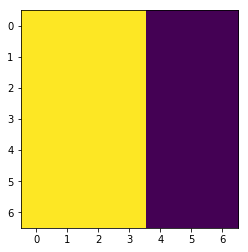

In [30]:
plt.imshow(img)

In [31]:
W = np.array([
    [1, 0, -1], 
    [1, 0, -1], 
    [1, 0, -1]
])

In [32]:
n = img.shape[0]
f = W.shape[0]
p = 0
s = 1
a = int((n+2*p-f)/s)+1

In [33]:
y = np.zeros((a,a))

In [34]:
for i in range(a):
    for j in range(a):
        y[i, j] = np.sum((img[i:i+f,j:j+f]*W))

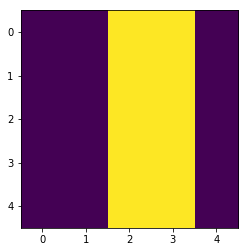

In [35]:
plt.imshow(y)

### MNIST with fully connected

Obtaining dataset

In [9]:
from keras.datasets import mnist

Using TensorFlow backend.


In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

One-hot encoding labels

In [11]:
def one_hot_encode(y):
    
    shape = tuple(list(y.shape)+[np.max(y)+1])
    l = np.zeros(shape)
    
    l[np.arange(l.shape[0]),y] = 1
    
    return l

In [12]:
Y_train = one_hot_encode(y_train).T

In [13]:
Y_test = one_hot_encode(y_test).T

Flattening inputs

In [14]:
m, h, w = x_train.shape

In [15]:
X_train = x_train.reshape(m, h*w).T

In [16]:
n, h, w = x_test.shape

In [17]:
X_test = x_test.reshape(n, h*w).T

Creating model

In [18]:
from meik.models import Sequential
from meik.layers import Layer, Dense, Dropout, Batch_norm

In [19]:
model = Sequential()

In [20]:
model.add(Dense(units=64, activation='relu', inputs=28*28))
model.add(Batch_norm())
model.add(Dense(units=32, activation='relu'))
model.add(Batch_norm())
model.add(Dense(units=16, activation='relu'))
model.add(Batch_norm())
model.add(Dense(units=10, activation='softmax'))

In [21]:
from meik import optimizers
optimizer = optimizers.Adam()

In [22]:
metrics = ['accuracy', 'binary_crossentropy', 'confusion_matrix']

In [23]:
model.build(loss='categorical_crossentropy', optimizer=optimizer, eval_metrics=metrics)#, normalization='normal')#

In [24]:
model.train(X_train, Y_train, batch_size=64, epochs=1, verbose=1)

Epoch 1/1 - loss_tot: 0.2743 - reg_loss: 0.0000 - categorical_crossentropy: 0.2743
------------ Final performance ------------

Epoch 1/1 - loss_tot: 0.2743 - reg_loss: 0.0000 - categorical_crossentropy: 0.2743


In [25]:
from meik.utils.misc import plot_training_loss

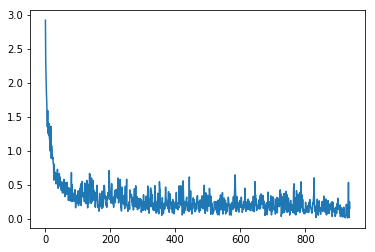

In [26]:
plot_training_loss(model, loss=model.params['loss'], mode='batch')

In [27]:
score = model.evaluate(X_test,Y_test)

### Extending to full layer with multiple channels and training examples 

Defining an input

In [ ]:
m = 12
nh_0 = 64
nw_0 = 64
nc_0 = 3

In [ ]:
A_0 = np.random.rand(m, nh_0, nw_0, nc_0)
#A_0 = np.expand_dims(A_0,axis=len(A_0.shape))

Defining layer parameters

In [ ]:
from meik.utils.activations import relu, drelu

In [ ]:
f_1 = 5
nc_1 = 10
s_1 = 1
p_1 = 0
g_1 = relu
dg_1 = drelu

In [ ]:
nh_1 = int((nh_0+2*p_1-f_1)/s_1)+1
nw_1 = int((nw_0+2*p_1-f_1)/s_1)+1

Defining layer variables

In [ ]:
W_1 = np.random.rand(f_1, f_1, nc_0, nc_1)

In [ ]:
b_1 = np.random.rand(1, 1, 1, nc_1)

In [ ]:
Z_1 = np.zeros((m,nh_1,nw_1,nc_1))

Computing forwardprop

In [ ]:
for i in range(nh_1):
    for j in range(nw_1):
        axes = tuple(i for i in range(1,len(Z_1.shape)))
        # Note on np.newaxis: extension of A dimension such that it is copied along the additional axis for multiplication
        Z_1[:, i, j, :] = np.sum((A_0[:,i:i+f_1,j:j+f_1,:,np.newaxis]*W_1), axis=axes) + b_1
A_1 = g_1(Z_1)

### Computing backprop

In [ ]:
dA_1 = np.random.random(A_1.shape)

In [ ]:
dZ_1 = dg_1(A_1)*dA_1

In [ ]:
axes = tuple(i for i in range(0,len(dA_1.shape)-1))
db_1 = np.sum(dZ_1, axis=axes, keepdims=True)

In [ ]:
#For 2D input, single example, single filter

A = A_0[0,:,:,0]
W = W_1[:,:,0,0]
dZ = dZ_1[0,:,:,0]
dW = np.zeros(W.shape)
dA = np.zeros(A.shape)

for i in range(nh_1):
    
    for j in range(nw_1):

            dW += A[i:i+f_1,j:j+f_1]*dZ[i,j]
            
            dA[i:i+f_1,j:j+f_1] += dZ[i,j]*W

In [ ]:
#For 3D input, single example, single filter

A = A_0[0,:,:,:]
W = W_1[:,:,:,0]
dZ = dZ_1[0,:,:,0]
dW = np.zeros(W.shape)
dA = np.zeros(A.shape)

for i in range(nh_1):
    
    for j in range(nw_1):
    
            dW += A[i:i+f_1,j:j+f_1,:]*dZ[i,j]
            
            dA[i:i+f_1,j:j+f_1,:] += dZ[i,j]*W

In [ ]:
#For 3D input, single example, multiple filters

A = A_0[0,:,:,:] 
W = W_1[:,:,:,:]
dZ = dZ_1[0,:,:,:]
dW = np.zeros(W.shape)
dA = np.zeros(A.shape)

for i in range(nh_1):
    
    for j in range(nw_1):
    
            dW += A[i:i+f_1,j:j+f_1,:,np.newaxis]*dZ[i,j,:]
            
            dA[i:i+f_1,j:j+f_1,:] += np.sum(W*dZ[i,j,:], axis=3, keepdims=False) #summing across layer 1 filters

In [ ]:
#For 3D input, multiple examples, multiple filter

A = A_0[:,:,:,:] 
W = W_1[:,:,:,:]
dZ = dZ_1[:,:,:,:]
dW = np.zeros(W.shape)
dA = np.zeros(A.shape)

for i in range(nh_1):
    
    for j in range(nw_1):
        
            A_ = A[:,i:i+f_1,j:j+f_1,:,np.newaxis]
            dZ_ = dZ[:,i,j,:][:,np.newaxis,np.newaxis,np.newaxis,:] 
            
            dW += np.sum(A_*dZ_, axis=0, keepdims=False)
            
            W_ = W[np.newaxis]
            
            dA[:,i:i+f_1,j:j+f_1,:] += np.sum(W_*dZ_, axis=4, keepdims=False)

In [ ]:
A_.shape

In [ ]:
dZ_.shape

In [ ]:
(A_*dZ_).shape

In [ ]:
np.sum(A_*dZ_, axis=0, keepdims=False).shape

### Convolution layer class

In [ ]:
from meik.layers import Layer
from meik.initializer import Initializer
from meik.utils import activations

class Convolution3D(Layer):
    
    def __init__(self, filters, kernel_size, strides = 1, padding = 'valid', inputs = None, units = None, activation = None, initialization = None, init_params = None):
        
        Layer.__init__(self)
        
        self.id = None

        self.inputs = inputs
        self.units = units
        self.activation = activation
        self.optimizer = None #this gets assigned by model in model.build()
        
        self.f = kernel_size
        self.nc = filters
        self.s = strides

        if padding == 'valid':
            self.p = 0
        elif padding == 'same':
            self.p = kernel_size/2

        # setting activation methods
        self.g = getattr(activations, activation)
        self.dg = getattr(activations, 'd'+activation)

        # setting initializer
        self.initializer = Initializer(activation = activation, initialization = initialization, init_params = init_params)

        # declaring important variables            
        self.W = None
        self.b = None
        self.A = None
        self.A0 = None

        self.dW = None
        self.db = None

        # setting prediction of layer as forwardprop
        self.predict = self.forwardprop
        self.grad_check_predict = self.forwardprop

    def init(self, _id, inputs):
        
        self.id = _id
        self.inputs = inputs

        f = self.f
        s = self.s
        p = self.p
        nc = self.nc
        
        nh_0, nw_0, nc_0 = inputs

        self.nh = int((nh_0+2*p-f)/s)+1
        self.nw = int((nw_0+2*p-f)/s)+1
    
        self.units = (self.nh, self.nw, self.nc)
        
        self.W = self.initializer.initialize((f,f,nc_0,nc))
        self.b = np.zeros((1, 1, 1, nc))

# http://cs231n.github.io/convolutional-networks/
# implement matrix multiplication version

    def forwardprop(self, A0):

        g = self.g
        W = self.W
        b = self.b

        nh = self.nh
        nw = self.nw
        nc = self.nc

        m = A0.shape[0]

        Z = np.zeros((m,nh,nw,nc))
        
        axes = tuple(i for i in range(1,len(Z.shape)))

        for i in range(nh_1):
            for j in range(nw_1):
                # Note on np.newaxis: extension of A dimension such that it is copied along the additional axis for multiplication
                Z[:, i, j, :] = np.sum((A0[:,i:i+f_1,j:j+f_1,:,np.newaxis]*W), axis=axes) + b
        A = g(Z)

        self.A = A
        self.A0 = A0

        return A

    def backprop(self, dA0):

        dg = self.dg
        W = self.W
        A0 = self.A0
        A = self.A
        
        nh = self.nh
        nw = self.nw

        m = A.shape[0]

        dW = np.zeros(W.shape)
        dA = np.zeros(A0.shape)

        dZ = dA0*self.dg(A)

        axes = tuple(i for i in range(1,len(dZ.shape)))
        db = np.sum(dZ, axis=axes, keepdims=True)

        for i in range(nh):
            
            for j in range(nw):
                
                    A0_ = A0[:,i:i+f_1,j:j+f_1,:,np.newaxis]
                    dZ_ = dZ[:,i,j,:][:,np.newaxis,np.newaxis,np.newaxis,:] 
                    dW += 1./m * np.sum(A0_*dZ_, axis=0, keepdims=False)
                    
                    W_ = W[np.newaxis]
                    
                    dA[:,i:i+f_1,j:j+f_1,:] += np.sum(W_*dZ_, axis=4, keepdims=False)

        self.dW = dW
        self.db = db

        return dA
    
    def update(self):

        W = self.W
        b = self.b
        dW = self.dW
        db = self.db

        W, b = self.optimizer.update(W, b, dW, db)

        self.W = W
        self.b = b

### Testing forwardprop

In [ ]:
m = 12
nh_0 = 64
nw_0 = 64
nc_0 = 3

In [ ]:
A_0 = np.random.rand(m, nh_0, nw_0, nc_0)

In [ ]:
f_1 = 5
nc_1 = 10
s_1 = 1
p_1 = 0

In [ ]:
L1 = Convolution3D(nc_1, f_1, activation = 'relu', inputs = (nh_0, nw_0, nc_0))

In [ ]:
L1.init(0, (nh_0, nw_0, nc_0))

In [ ]:
A1 = L1.forwardprop(A_0)

### Testing backprop

In [ ]:
dA = L1.backprop(dA_1)

### Gradient checking

In [ ]:
from meik.models import Sequential
from meik.utils import gradient_check

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution3D(nc_1, f_1, strides = s_1, padding = 'valid', activation = 'relu', inputs = (nh_0, nw_0, nc_0)))

In [ ]:
X = A_0

In [ ]:
A = model.forwardprop(X)

In [ ]:
theta, dtheta = gradient_check.get_params(model)

In [ ]:
dtheta = np.zeros(theta.shape)

dAdtheta_list = []
epsilon = 1e-7

for i in range(10):

    tplus = theta.copy()   
    tplus[i] += epsilon
    
    model = gradient_check.set_params(model,tplus)
    dAplus = model.layers[0].forwardprop(X)
    
    tminus = theta.copy()
    tminus[i] -= epsilon
    
    model = gradient_check.set_params(model,tminus)
    dAminus = model.layers[0].forwardprop(X)
    
    dAdtheta = (dAplus - dAminus)/(2*epsilon)
    dAdtheta_list.append(dAdtheta)

In [ ]:
dAdtheta_list[0].shape

In [ ]:
dLdA = np.ones(dAdtheta.shape)

In [ ]:
dA = L1.backprop(dLdA)

In [ ]:
L1.dW